In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])

In [5]:
boston_df['MEDV'] = boston['target']

В первой лабораторной рассматавалась ПЛР регрессора MEDV и регрессанат LSTAT

Выберем ещё один регрессор, такой, чтобы он хорошо коррелировал с регрессантом(MEDV) и слабо коррелировал с уже имеющимся регрессором (LSTAT)

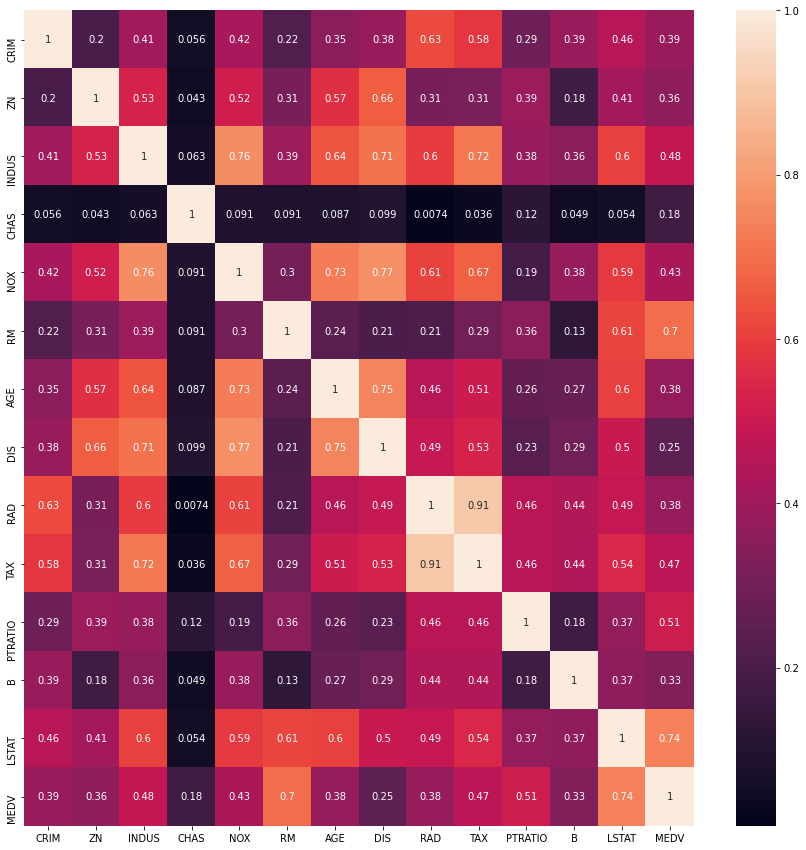

In [6]:
# Коэф корреляции взят по модулю для удобства
plt.figure(figsize = (15, 15))
hm = sns.heatmap(boston_df.corr().abs(),
                cbar = True,
                annot=True)


Лучше всего подходит регрессор PTRATIO

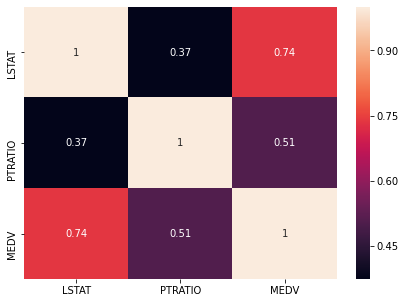

In [7]:
# Коэф корреляции взят по модулю для удобства
plt.figure(figsize = (7, 5))
hm = sns.heatmap(boston_df[['LSTAT', 'PTRATIO', 'MEDV']].corr().abs(),
                cbar = True,
                annot=True)

### 1.	Определите, что из полученных данных рассматривается как изучаемый показатель, а что – как объясняющие факторы (2). Установите, в каких единицах проводятся измерения этих переменных.

Изучаемый показатель(регрессант):  MEDV Median value of owner-occupied homes in $1000's <br>
Объясняющий фактор 1: LSTAT -  % lower status of the population <br>
Объясняющий фактор 2: PTRATIO -  pupil-teacher ratio by town <br>
For example, PTRATIO in developed countries below 16, but it ranges from 40 in Brazil to 28 in Mexico to 11 in Hungary and Luxembourg.

### 2.	Постройте парные линейные регрессии показателя от каждого из факторов, взятых по отдельности. Вычислите коэффициенты обеих ПЛ и коэффициенты детерминации

#### 2.1 MEDV ~ LSTAT

In [8]:
X_LSTAT = boston_df.iloc[:,-2].values[:,np.newaxis]
X_PTRATIO = boston_df.iloc[:,-4].values[:,np.newaxis]
y = boston_df.iloc[:,-1].values

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_LSTAT,y)
y_pred = model.predict(X_LSTAT)
print(f'a = {model.intercept_}\nb = {model.coef_[0]}\nR^2 = {model.score(X_LSTAT, y)}')

a = 34.5538408793831
b = -0.9500493537579905
R^2 = 0.5441462975864797


#### 2.2 MEDV ~ PTRATIO

In [10]:
model = LinearRegression()
model.fit(X_PTRATIO,y)
y_pred = model.predict(X_PTRATIO)
print(f'a = {model.intercept_}\nb = {model.coef_[0]}\nR^2 = {model.score(X_PTRATIO, y)}')

a = 62.34462747483259
b = -2.157175296060961
R^2 = 0.257847318009223


### !!! 3.	Исследуйте модель на наличие мультиколлинеарности факторов с помощью матрицы факторов.

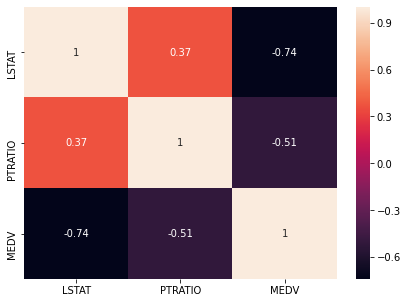

In [11]:
plt.figure(figsize = (7, 5))
hm = sns.heatmap(boston_df[['LSTAT', 'PTRATIO', 'MEDV']].corr(),
                cbar = True,
                annot=True)

Данные два регрессора коррелируют с коэф. корреляции пирсона 0.37 <br>
Мультиколлинераность присутствует, но не сильно выражена

### 4.	Вычислите коэффициенты уравнения множественной линейной регрессии в матричной форме, запишите уравнение регрессии в развёрнутой форме.

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('MEDV ~ LSTAT + PTRATIO', data = boston_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     387.9
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          1.22e-102
Time:                        23:52:07   Log-Likelihood:                -1604.2
No. Observations:                 506   AIC:                             3214.
Df Residuals:                     503   BIC:                             3227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.0468      2.242     24.105      0.000      49.642      58.452
LSTAT         -0.8202      0.039    -21.120      0.000      -0.896      -0.744
PTRATIO       -1.1453      0.128     -8.941      0.000      -1.397      -0.894
==============================================================================
Omnibus:                      150.452   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.510
Skew:                           1.462   Prob(JB):                     2.39e-88
Kurtosis:                       6.253   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
len(results.predict())

506

Оценка коэф **a** = 54.0468 <br>
Оценка коэф **b1** = -0.8202 (LSTAT) <br>
Оценка коэф **b2** = 1.1453 (PTRATIO) <br>

Уравнение МЛР: Y^ = 54.0468 - 0.8202\*X1 + 1.1453\*X2 <br>
R^2: 0.607

### 5.	Вычислите расчетные значения показателя и остатки.

Text(0, 0.5, 'residuals')

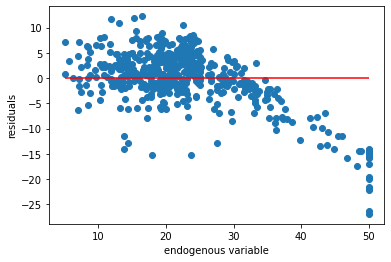

In [14]:
y_pred = results.predict()
plt.scatter(y, y_pred - y)
plt.hlines(xmin=y.min(), xmax = y.max(), y=0, color = 'r')
plt.xlabel('endogenous variable')
plt.ylabel('residuals')

### 6.	Вычислите и сравните частные и парные коэффициенты корреляции.

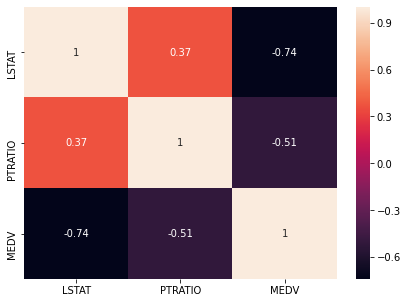

In [15]:
df_corr = boston_df[['LSTAT', 'PTRATIO', 'MEDV']].corr()
plt.figure(figsize = (7, 5))
hm = sns.heatmap(df_corr,
                cbar = True,
                annot=True)

In [16]:
df_corr['LSTAT']['MEDV']

-0.7376627261740143

Коэффициенты парной корреляции:

In [17]:
r_yx1 = df_corr['LSTAT']['MEDV']
r_yx2 = df_corr['PTRATIO']['MEDV']
r_x1x2 = df_corr['LSTAT']['PTRATIO']
print( f'r_yx1 = {r_yx1}\nr_yx2 = {r_yx2}\nr_x1x2 = {r_x1x2}')

r_yx1 = -0.7376627261740143
r_yx2 = -0.507786685537561
r_x1x2 = 0.3740443167146754


Коэффициенты частной корреляции:

In [18]:
r_yx1_without_x2 = (r_yx1 - r_yx2*r_x1x2)/((1 - r_yx2**2)*(1 - r_x1x2**2))**(1/2)
r_yx2_without_x1 = (r_yx2 - r_yx1*r_x1x2)/((1 - r_yx1**2)*(1 - r_x1x2**2))**(1/2)
print(f'r_yx1|x2 = {r_yx1_without_x2}\nr_yx2|x1 = {r_yx2_without_x1}')

r_yx1|x2 = -0.6855610739745195
r_yx2|x1 = -0.3703020892792919


Так как коэффициенты корреляции без учёта влияния других факторов <br>
уменьшились по модулю на ~ 0.1(относитительно малое изменение), <br>
можно сделать вывод, что между регрессорами корреляция слабая и мультиколлинеарность практически отсутствует

### 7.	Найдите величину средней относительной ошибки аппроксимации и оценку для дисперсии остатков.

Cредняя относительная ошибка аппроксимации:

In [19]:
def mean_relative_error_approximation(y_true, y_pred):
    A = 100*(abs(y_true-y_pred)/abs(y_true)).sum()/len(y_true)
    return A
print(f' Mean realative error of aproximation: {mean_relative_error_approximation(y, y_pred)}')

 Mean realative error of aproximation: 19.089627410695766


Несмещённая оценка дисперсии остатков:

In [20]:
n = len(y)
k = 2
s_res_squared = ((((y-y_pred)**2)/(n-k-1)).sum())
print(f's_res^2 = {s_res_squared}')

s_res^2 = 33.40409075720355


### 8.	Вычислите множественный коэффициент детерминации и сравните его  с коэффициентами детерминации найденных ранее ПЛ. Вычислите коэффициент детерминации Тейла

R^2 ПЛР x1(LSTAT) и y(MEDV):   0.5441462975864797 <br>
R^2 ПЛР x2(PTRATIO) и y(MEDV): 0.257847318009223 <br>
R^2 МЛР x1, x2 и y:            0.607 <br>
R^2 МЛР x1, x2 и y: adjusted:  0.605 - коэффициент детерминации Тейла <br>

Посчитано таблицы OLS Regression Results с помощью библиотеки statsmodels.formula.api.smf.ols

### 9.	Проверьте статистическую значимость полученных значений параметров регрессии с помощью критерия Стьюдента и критерия Фишера.

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     387.9
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          1.22e-102
Time:                        23:52:17   Log-Likelihood:                -1604.2
No. Observations:                 506   AIC:                             3214.
Df Residuals:                     503   BIC:                             3227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.0468      2.242     24.105      0.000      49.642      58.452
LSTAT         -0.8202      0.039    -21.120      0.000      -0.896      -0.744
PTRATIO       -1.1453      0.128     -8.941      0.000      -1.397      -0.894
==============================================================================
Omnibus:                      150.452   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.510
Skew:                           1.462   Prob(JB):                     2.39e-88
Kurtosis:                       6.253   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Критерий Стьюдента
a = Intercept = 54.0468
b1 = LSTAT = -0.8202
b2 = PTRATIO = -1.1453

t_value_a = 24.105,    p_value_a = 0.000
Следовательно **p_value_a < 0.05**, значит мы может отклонить гипотезу о том что параметр Alpha = 0, тогда принимаем гипотерзу о том что оценка **a** параметра **Alpha** является статистически значимой

t_value_b_1 = -21.120,    p_value_b_1 = 0.000
Следовательно **p_value_b_1 < 0.05**, значит мы может отклонить гипотезу о том что параметр Beta_1 = 0, тогда принимаем гипотерзу о том что оценка **b_1** параметра **Beta_1** является статистически значимой

t_value_b_2 = -1.1453,    p_value_b_2 = 0.000
Следовательно **p_value_b_2 < 0.05**, значит мы может отклонить гипотезу о том что параметр Beta_2 = 0, тогда принимаем гипотерзу о том что оценка **b_2** параметра **Beta_2** является статистически значимой

### Критерий Фишера
F-statistic: 387.9 <br>
Prob (F-statistic): 1.22e-102 <br>
degree of freedom = n - k - 1 = 503 <br>
Следовательно **p_value < 0.05**, А это значит что данное построенное уравнение МЛР является статичтически значимым

### 10.	Постройте точечный прогноз значения y для фиксированного x. Вычислите стандартную ошибку и доверительный интервал полученного прогноза.

In [22]:
x1_t = boston_df.loc[18, 'LSTAT']
x2_t = boston_df.loc[18, 'PTRATIO']
y_t = boston_df.loc[18, 'MEDV']
print(f'x1_t = {x1_t}\nx2_t = {x2_t}\ny_t = {y_t}')


x1_t = 11.69
x2_t = 21.0
y_t = 20.2


In [23]:
df_t = pd.DataFrame({'LSTAT': x1_t, 'PTRATIO' : x2_t}, index= [1])

In [24]:
y_pred_t = results.predict(df_t).values[0]
print(f'y_pred_t = {y_pred_t}')

y_pred_t = 20.40863713909109


##### Сандартная ошибка:

In [25]:
res = (y[301] - y_pred_t)**2
print(f'residual: {res}')

residual: 2.532435755080187


##### Несмещеённая оценка дисперсии:

In [26]:
s_res = ((((y-y_pred)**2)/(n-k-1)).sum())**(1/2)
print(f's_res = {s_res}')

s_res = 5.779627216110357


In [27]:
X = boston_df.iloc[:,[-2, -4]].values
x_t = np.array([x1_t, x2_t])
print(x_t)

[11.69 21.  ]


Оценка среднеквадратического отклонения (ошибка отклонения):

In [28]:
S_e = s_res * (x_t.dot(np.linalg.inv(X.T.dot(X))).dot(x_t))**(1/2)
print(f'S_e = {S_e}') 

S_e = 0.31032649215164276


Доверительный интервал прогноза индивиудального значения:

In [29]:
# Дов интревал
from scipy import stats

t_value = stats.t.ppf(1.0 - 0.05/2, n-2)
t_value

1.964682003389552

In [30]:
print(f'Доверительный интервал для y_t = 20.4 :({y_pred_t - t_value*S_e}; {y_pred_t + t_value*S_e})')


Доверительный интервал для y_t = 20.4 :(19.79894426478575; 21.018330013396433)


### 11.	Продумайте  и примените к полученной регрессии условия реализации основных положений регрессионного анализа.

##### 1. Препосылки относително регрессора
    1) Детерменированность регрессоров:
        +Данные по всем городам собраны в один короткий промежуток времени
        +Данные для коэффициенту студент/учитеть было собраны по всем уч. заведениям достаточно полно
        -Возможно в процент бедного населения не удалось включить всех бездомных.
        
        Вывод: Данные достаточно детерменированные, смещённость оценок должна быть минимальна
        
    2) Измеренение регрессора без ошибок:
        Измерено без ошибок поскольку измерение проводится без приборов, а посредоством прямого подсчёта кол-ва людей.
        Выбранны исследователями порог для оценки класса бедного населения не даёт занитальной погрешности.
        
        Вывод: Погрешность измерения незначительная => смещённость оценок минимальна
        **a**
    
    3) Неколлинеарность регрессоров
        rang X = 2 = k => столбцы линейно независимы
        регрессоры неколлинеарны
        
        Вывод: модель идентифицируема, то есть сущ. ед. оценка по МНК 
    
    4) Количество наблюдений больше числа оцениваемых параметров:
        Кол. оцениваемых парам. = 3
        Кол. наблюдений = 506
        Число степеней свободы 503(большое) => низкая гетероскедастичность
        
        Вывод: оценки обладают состоятельностью, так как число наблюдений сильно больше числа параметров
        
    5) Модель содержит все значимые факторы:
        Не понял из лекций как это доказать.
        Видимо если у нас средняя относительная ошибка апроксимации меньще 20% то можно сказать что все значимые факторы учтены

In [31]:
print(f'Rang X = {np.linalg.matrix_rank(X)}')

Rang X = 2


### 2. Предпосылки относительно случайной составляющей
1) Центрирована: <br>
    Мат ожидание  остатков (среднее):
    $$E_\varepsilon = -1.30902754599914*10^{-13}$$
    Мат ожидание по формуле:
    $$ Ee = HEY = 22.4 $$
2) Гомоскедостична и некорррелирована в различных наблюдениях: <br>
    по методу Гольдефльда-Квандта остатки гетероскедастичны(p-value = 0.13) <br>
    Ниже я пытался понять как строить матрицу ковариации остатков <br
    В общем исходя из с матрица корреляций возмущений, так как недиаганальные элементы ненулевые, следует что остатки корреллруют между собой и гетероскедастичны. Но, кстати, элементы на диагонали почти равны, что говорит что остатки почти гомоскедастичны?
    Что такое матрица остатков и откуда она берётся я тоже не понял:
    $$ \Sigma_{\varepsilon} $$

    
3) Нормальность распределения:
    Распределение по графику похоже на нормальное

In [40]:
X = X.T
X

array([[ 4.98, 15.3 ],
       [ 9.14, 17.8 ],
       [ 4.03, 17.8 ],
       ...,
       [ 5.64, 21.  ],
       [ 6.48, 21.  ],
       [ 7.88, 21.  ]])

$$ H = E - X(X^TX)^{-1}X^T : $$

In [44]:
E = np.eye(X.shape[0])
H = E - X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
print(H.shape)
H

(506, 506)


array([[ 0.99727636, -0.00234522, -0.00360271, ..., -0.00403247,
        -0.00382576, -0.00348125],
       [-0.00234522,  0.99773957, -0.00297509, ..., -0.00338609,
        -0.00326862, -0.00307282],
       [-0.00360271, -0.00297509,  0.99516754, ..., -0.00537935,
        -0.00507403, -0.00456516],
       ...,
       [-0.00403247, -0.00338609, -0.00537935, ...,  0.99399898,
        -0.00567336, -0.00512726],
       [-0.00382576, -0.00326862, -0.00507403, ..., -0.00567336,
         0.99462342, -0.00488194],
       [-0.00348125, -0.00307282, -0.00456516, ..., -0.00512726,
        -0.00488194,  0.99552692]])

 Диагональ H:

In [70]:
H.diagonal()[:50]

array([0.99727636, 0.99773957, 0.99516754, 0.9936052 , 0.99545113,
       0.99537037, 0.99852029, 0.99542891, 0.98221417, 0.99679092,
       0.99437461, 0.99835001, 0.99750517, 0.99574255, 0.99666916,
       0.9958563 , 0.99469365, 0.99747528, 0.99711704, 0.99700693,
       0.99564595, 0.99745297, 0.99671618, 0.99623428, 0.99734239,
       0.99730836, 0.99747299, 0.99715056, 0.99734132, 0.99718604,
       0.99464247, 0.99737563, 0.989901  , 0.99684512, 0.99601057,
       0.99731464, 0.99773271, 0.9969896 , 0.9974486 , 0.99502301,
       0.99307074, 0.99566155, 0.99626264, 0.99708725, 0.99780935,
       0.99795522, 0.99803285, 0.99637648, 0.98334226, 0.99753587])

Несмещённая оценка дисперсии остатков $$ S_{res}= $$

In [55]:
s_res = ((((y-y_pred)**2)/(n-k-1)).sum())**(1/2)
print(f's_res = {s_res}')

s_res = 5.779627216110357


Ковариационная матрица остатков (формула из интерента, так как в лециях ее не нашёл):
    $$ cov(\varepsilon) =  S_{res}^{2}(E - X(X^TX)^{-1}X^T) = S_{res}^{2}H:$$

In [74]:
cov_eps_matrix = (H*(s_res**2))
cov_eps_matrix

array([[33.31310998, -0.07833985, -0.1203451 , ..., -0.13470114,
        -0.12779617, -0.11628788],
       [-0.07833985, 33.32858315, -0.09938011, ..., -0.11310936,
        -0.10918512, -0.1026447 ],
       [-0.1203451 , -0.09938011, 33.24266692, ..., -0.17969237,
        -0.1694934 , -0.15249512],
       ...,
       [-0.13470114, -0.11310936, -0.17969237, ..., 33.20363223,
        -0.18951338, -0.17127146],
       [-0.12779617, -0.10918512, -0.1694934 , ..., -0.18951338,
        33.22449107, -0.16307687],
       [-0.11628788, -0.1026447 , -0.15249512, ..., -0.17127146,
        -0.16307687, 33.25467154]])

In [103]:
cov_eps_matrix.diagonal()[:50]

array([33.31310998, 33.32858315, 33.24266692, 33.19047835, 33.25213991,
       33.24944213, 33.35466232, 33.25139757, 32.80997112, 33.29689421,
       33.21617981, 33.34897446, 33.32075331, 33.2618746 , 33.2928272 ,
       33.26567412, 33.22683685, 33.31975478, 33.30778823, 33.30411004,
       33.25864764, 33.31900943, 33.2943978 , 33.2783004 , 33.31531568,
       33.31417892, 33.31967844, 33.30890772, 33.31527987, 33.31009312,
       33.22512729, 33.31642605, 33.06674285, 33.29870478, 33.2708276 ,
       33.3143889 , 33.32835406, 33.30353119, 33.31886347, 33.23783892,
       33.17262513, 33.25916891, 33.27924767, 33.30679308, 33.3309142 ,
       33.33578669, 33.33837995, 33.28305026, 32.84765413, 33.3217788 ])

Ковариационная матрица остатков по формуле ковариации:
    $$ {1\over n} \sum (x_{i} - \bar{x})(y_{i} - \bar{y}) $$
где
    $$ x = \varepsilon_{i}, y = \varepsilon_{j} $$
А \varepsilon_{i} - это одно число, так как это остаток. <br>
Не понимаю как можно считать ковариацию между попарно между всеми остатками, так как остаток это число. <br>
Получится ведь везде ноль

In [77]:
# Ковариационная матрица
residuals = np.array(y_pred - y)
residuals_column = residuals[:, np.newaxis]
cov_matrix = np.cov(residuals_column, bias = True)
cov_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Мат ожидание остатков (среднее):

In [50]:
res_mean  = np.mean(residuals)
print(res_mean)

-1.309027545999141e-13


$$Ee = HEY :$$

In [67]:
(H * y.mean()).diagonal()[:10]

array([22.47143503, 22.48187249, 22.4239175 , 22.38871358, 22.43030753,
       22.42848774, 22.49946426, 22.42980679, 22.13204156, 22.46049665])

In [181]:
# Гомоскедастичкность

from statsmodels.stats.diagnostic import het_goldfeldquandt
homo = het_goldfeldquandt(residuals, X, split=0.5, alternative = 'increasing')
print(f'F-statistic: {homo[0]} \np-value = {homo[1]}')

F-statistic: 1.149074116866479 
p-value = 0.1358392705569332


(array([  2.,   5.,   7.,  18.,  16.,  41., 148., 176.,  85.,   8.]),
 array([-26.90357379, -22.98893985, -19.0743059 , -15.15967195,
        -11.245038  ,  -7.33040405,  -3.4157701 ,   0.49886385,
          4.4134978 ,   8.32813174,  12.24276569]),
 <BarContainer object of 10 artists>)

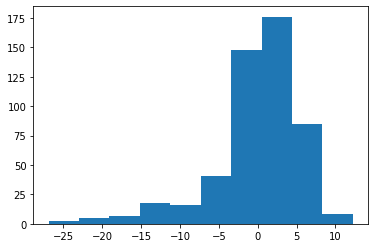

In [179]:
# Нормальность распределения
plt.hist(residuals)

### 3. Предпосылки относительно коэффициентов регрессии
    
1) Коэффициенты регрессии - детерминируемы величины <br>
2) Коэффициенты линейной регрессии являются постоянными величинами независящими ни от номера i наблюдений, ни от времени t 

### 4 Моедль правильно специфицирована.

### Сделаем преобразование регрессоров и регрессаната

In [79]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [83]:
X

array([[ 4.98, 15.3 ],
       [ 9.14, 17.8 ],
       [ 4.03, 17.8 ],
       ...,
       [ 5.64, 21.  ],
       [ 6.48, 21.  ],
       [ 7.88, 21.  ]])

In [87]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
regr = LinearRegression()
regr.fit(X_log, y_sqrt)
y_pred = regr.predict(X_log)

y_r2_score = r2_score(y_sqrt, y_pred)


R^2 = 0.7254391266721365
MSE = 17.922801867232078


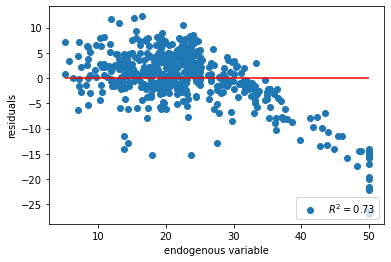

In [101]:
y_pred = results.predict()
plt.scatter(y, y_pred - y, label = '$R^2={:.2f}$'.format(y_r2_score))
plt.hlines(xmin=y.min(), xmax = y.max(), y=0, color = 'r')
plt.xlabel('endogenous variable')
plt.ylabel('residuals')
print(f'R^2 = {y_r2_score}')
plt.legend(loc = 'lower right')
print(f'MSE = {mean_absolute_error(y_sqrt, y_pred)}')

Например, точки и линия регрессии с данным преобразовании в случае только одного регрессора будет выглядеть следующим образом

In [106]:
X

array([[ 4.98, 15.3 ],
       [ 9.14, 17.8 ],
       [ 4.03, 17.8 ],
       ...,
       [ 5.64, 21.  ],
       [ 6.48, 21.  ],
       [ 7.88, 21.  ]])

Text(0, 0.5, "$sqrt{Price \\;in \\; \\$1000's [MEDV]}$")

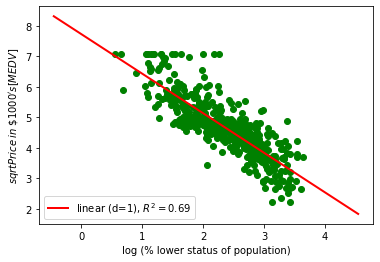

In [109]:
X_log = np.log(X[:,0][:,np.newaxis])
y_sqrt = np.sqrt(y)
regr = LinearRegression()
regr.fit(X_log, y_sqrt)
y_pred = regr.predict(X_log)
y_fit = regr.predict(X_fit)
y_r2_score = r2_score(y_sqrt, y_pred)
plt.scatter(X_log, y_sqrt,
           color = 'g')
plt.plot(X_fit, y_fit,
        color = 'red',
        lw = 2,
        label = 'linear (d=1), $R^2={:.2f}$'.format(y_r2_score))
plt.legend(loc = 'lower left')
plt.xlabel('log (% lower status of population)')
plt.ylabel('$sqrt{Price \;in \; \$1000\'s [MEDV]}$')